## Prueba #0503

### "Aumento de datos"

#### Responda las siguientes preguntas proporcionando código Python:
#### Objetivos:
- Codifique las funciones de ayuda.
- Optimice y pruebe un modelo predictivo de su elección.
- Realice aumentos de datos para mejorar la precisión predictiva cuando los datos de entrenamiento proporcionados son pequeños.

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Desactivar las advertencias
%matplotlib inline

#### Leer los datos:
La explicación de los datos originales se puede encontrar [aquí](http://yann.lecun.com/exdb/mnist/).
- Los datos que usaremos son un pequeño subconjunto de los datos originales con solo 100 observaciones.
- Cada observación es la versión "aplanada" de una imagen.
- La primera columna corresponde a la etiqueta (Y).
- El tamaño de la imagen es 28x28.

In [2]:
# Ir al directorio dónde se ecuentra el fichero 
os.chdir(r'C:\Users\cocol\Samsung IA\3. Maching Learning\Enunciados-20211115\Data')                # Reemplazar por la ruta adecuada

In [3]:
# Lea los datos de entrenamiento y prueba por separado.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Escale y divida el conjunto de datos en X e Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). Codifique la función auxiliar 'show_data ()' que visualiza cada observación dada. SUGERENCIA: use matplotlib.pyplot.imshow () y scipy.ndimage.interpolation ().

In [4]:
print(X_train.shape)
print(Y_train.shape)

(100, 784)
(100,)


In [5]:
def show_data(X, Y, n, angle=0):
    # X data , Y target  , n posicion del dato  
    data = X[n,:].reshape((28,28))   # los pixeles de la imagen son 28x28
    data = rotate(data, angle, reshape=False)   # Rotación de la imagen 
    plt.imshow(data, cmap = 'Greys', interpolation='nearest')  # muestra de la imagen 
    return Y[n] # devuelve el numero representado   
  

3

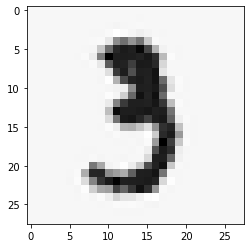

In [6]:
# Ejemplo 1.
show_data(X_train, Y_train,10,+10)

3

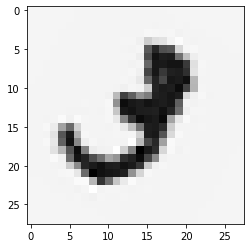

In [7]:
# Ejemplo 2.
show_data(X_train, Y_train,10,-30)

1

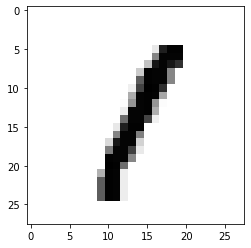

In [8]:
# Ejemplo 3.
show_data(X_train, Y_train,77,0)

2). Elija un algoritmo y realice el análisis predictivo.
- Optimizar los hiperparámetros.
- Calcule la precisión.
- ¿Es la precisión lo suficientemente alta?

In [9]:
# k-nearest neighbors classifier 

# los hiperametros
hyperparameters = {
    'n_neighbors' : np.arange(1,10,1)
}
# uso el clasificador 
knn = KNeighborsClassifier()
# Usamos GridSearch
clf = GridSearchCV(knn,hyperparameters,cv=5)
# fit del modelo
best_model = clf.fit(X_train,Y_train)
best_n_neighbors = best_model.best_estimator_.get_params()['n_neighbors']

print('Best n_neighbors : ', best_n_neighbors)

Best n_neighbors :  1


In [10]:
# Mejor n_neighbors
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train,Y_train)
y_pred = knn.predict(X_test)
precision = metrics.accuracy_score(Y_test,y_pred)

print('The accuracy is : ' + str(precision))

The accuracy is : 0.67


In [11]:
## la precisión no es suficientemente alta 

3). Codifique la función auxiliar 'rotate_data ()' que rota cada observación dada en un ángulo. SUGERENCIA: use scipy.ndimage.interpolation ().

In [12]:
def rotate_data(X, angle=0):
    data = X.reshape((28,28))
    data = rotate(data, angle, reshape=False)
    return data

In [13]:
rotate_data(X_train[1],-30)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000032e-02,  9.99999898e-03,  1.00000008e-02,
         1.00000013e-02,  9.99994450e-03,  1.00000208e-02,
         1.00001787e-02,  9.99995351e-03,  9.99975904e-03,
         1.00000144e-02,  9.99963159e-03,  1.00000311e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.99997688e-03,  9.99997724e-03,  1.00001278e-02,
         1.00000398e-02,  9.99981127e-03,  9.99991476e-03,
         9.99978078e-03,  9.99977504e-03,  1.00022621e-02,
         1.00010201e-02,  9.99529151e-03,  9.99837034e-03,
         9.99204197e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00

4). Aumente el conjunto de datos de entrenamiento.
- Aumente el tamaño del conjunto de datos de entrenamiento al introducir ligeras rotaciones (en sentido horario y antihorario).
- Utilice la función 'rotate_data ()' definida en el paso anterior.
- No es necesario aumentar el conjunto de datos de prueba.
- Objetivo aproximadamente cinco veces mayor.

In [14]:
       # <Tu código va aquí>

5). Rehaga el análisis predictivo con el conjunto de datos de entrenamiento aumentado.
- Utilice el mismo algoritmo que en el paso 2).
- Calcule la precisión.
- ¿Ha aumentado la precisión?

In [15]:
       # <Tu código va aquí>